In [ ]:
'''Question 1: Read an .jpg image and perform the following operations: (15
marks)
A. Resize an image using a Nearest Neighbour with an inbuilt function (ex.
cv2, PIL of python). (2 marks)
B. Resize an image using a Nearest Neighbour with a user defined
resizeNN(img, size, interpolation) function (10 marks)
C. Calculate the RMSE of resize images obtained from part a and part b. (2
marks)
D. Plot the original image, resized image(part a), resized image(part b) and their
RMSE Score. (1 marks)'''

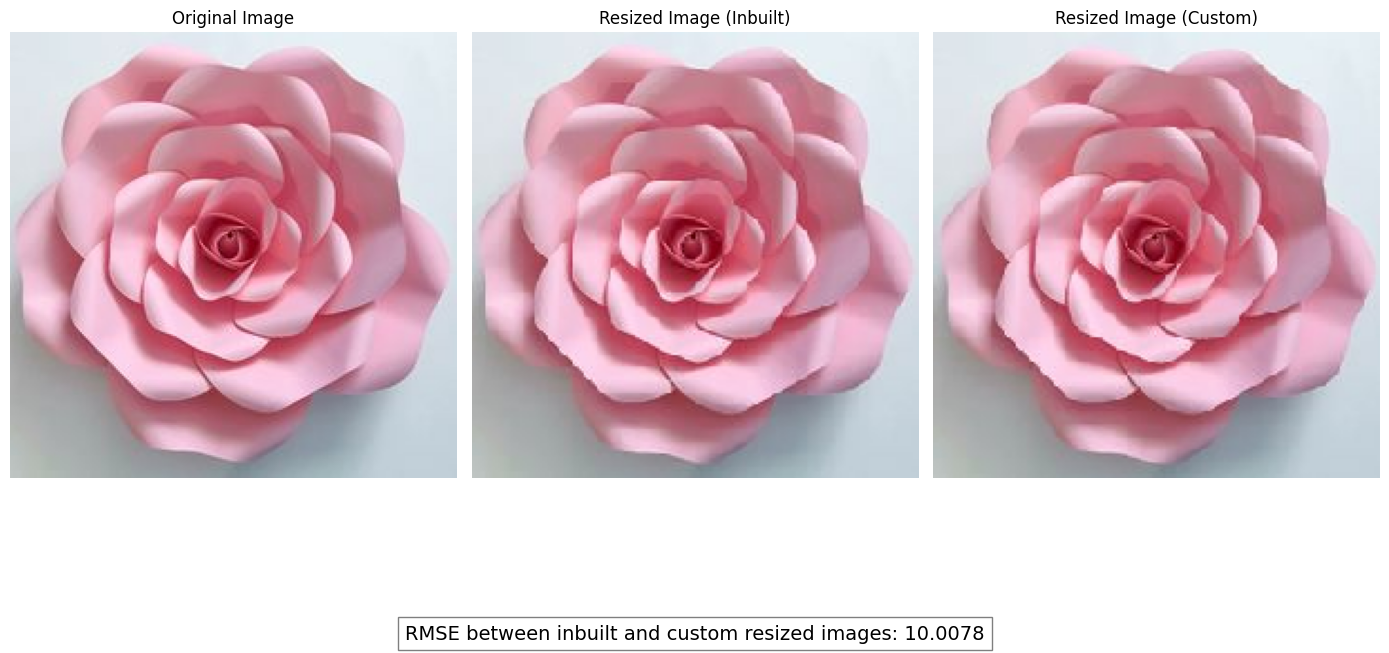

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# A. Resize an image using a Nearest Neighbor with an inbuilt function
def resize_with_inbuilt_function(image_path, new_size):
    
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found. Check the file path.")
    image_resized = cv2.resize(image, new_size, interpolation=cv2.INTER_NEAREST)
    return image, image_resized

# B. Resize an image using a Nearest Neighbor with a user-defined function
def resizeNN(img, size):
    
    # Extract original and target dimensions
    src_height, src_width = img.shape[:2]
    dst_width, dst_height = size

    # Create an empty array for the resized image
    resized_img = np.zeros((dst_height, dst_width, img.shape[2]), dtype=img.dtype)

    # Scaling factors
    x_scale = src_width / dst_width
    y_scale = src_height / dst_height

    # Compute the new pixel values using the corrected formula
    for y in range(dst_height):
        for x in range(dst_width):
            # Apply the formula: round(((x - 0.5) * n1 / n2) + 0.5) - 0.5
            src_x = int(round(((x - 0.5) * x_scale) + 0.5) - 0.5)
            src_y = int(round(((y - 0.5) * y_scale) + 0.5) - 0.5)
            
            # Ensure coordinates are within bounds
            src_x = min(max(src_x, 0), src_width - 1)
            src_y = min(max(src_y, 0), src_height - 1)

            # Assign the nearest pixel value
            resized_img[y, x] = img[src_y, src_x]

    return resized_img

# C. Calculate RMSE between the transformed images
def calculate_rmse_between_resized(resized_a, resized_b):
    
    mse = mean_squared_error(resized_a.flatten(), resized_b.flatten())
    return np.sqrt(mse)

# D. Plot original, resized images, and RMSE
def plot_results(original, resized_a, resized_b, rmse):
    
    plt.figure(figsize=(14, 8))
    
    # Plot original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    # Plot resized image (inbuilt)
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(resized_a, cv2.COLOR_BGR2RGB))
    plt.title("Resized Image (Inbuilt)")
    plt.axis("off")
    
    # Plot resized image (custom)
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(resized_b, cv2.COLOR_BGR2RGB))
    plt.title("Resized Image (Custom)")
    plt.axis("off")

    # Display RMSE value
    plt.figtext(0.5, 0.02, f"RMSE between inbuilt and custom resized images: {rmse:.4f}", 
                fontsize=14, ha="center", bbox={"facecolor": "white", "alpha": 0.5, "pad": 5})
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Replace with your image path
    image_path = "sample.jpg"  # Ensure the file path is correct
    target_size = (200, 200)  # Define the new size (width, height)
    
    # Part A: Resize using inbuilt function
    original_image, resized_image_a = resize_with_inbuilt_function(image_path, target_size)
    
    # Part B: Resize using custom function
    resized_image_b = resizeNN(original_image, target_size)
    
    # Part C: Calculate RMSE between the two resized images
    rmse = calculate_rmse_between_resized(resized_image_a, resized_image_b)
    
    # Part D: Plot results
    plot_results(original_image, resized_image_a, resized_image_b, rmse)


In [ ]:
'''Question 2: Read an .jpg image and perform the following operations: (15
marks)
A. Resize an image using a Bilinear Interpolation with an inbuilt function (ex.
cv2, PIL of python) (2 marks)
B. Resize an image using a Bilinear Interpolation with a user defined
resizeBI(img, size, interpolation) function (10 marks)
C. Calculate the RMSE of resized images obtained from part a and part b. (2
marks)
D. Plot the original image, resized image(part a), resized image(part b) and their
RMSE Score. (1 marks)
'''

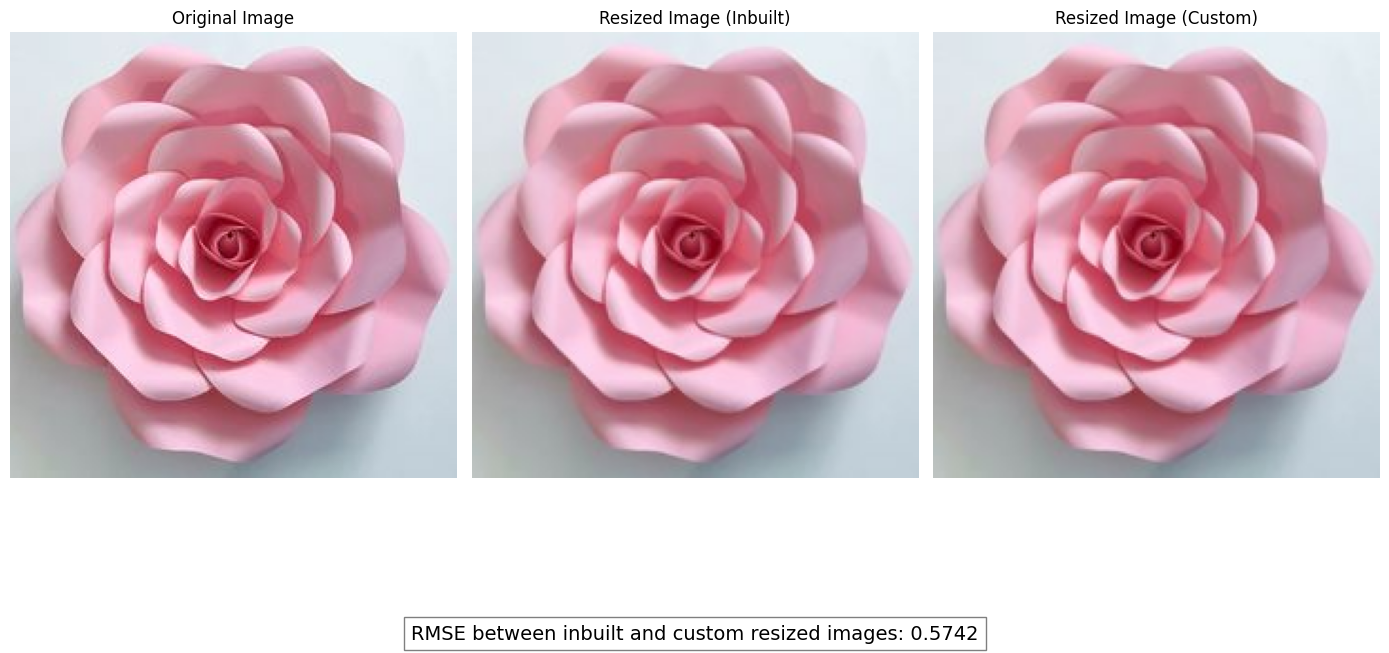

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# A. Resize using inbuilt bilinear interpolation
def resize_inbuilt_bilinear(image_path, size):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found. Check the file path.")
    resized_image = cv2.resize(image, size, interpolation=cv2.INTER_LINEAR)
    return image, resized_image

# B. Resize using custom bilinear interpolation
def resizeBI(img, size):
    src_height, src_width = img.shape[:2]
    dst_width, dst_height = size
    
    resized_img = np.zeros((dst_height, dst_width, img.shape[2]), dtype=img.dtype)
    
    # Scaling factors
    x_scale = src_width / dst_width
    y_scale = src_height / dst_height
    
    for y in range(dst_height):
        for x in range(dst_width):
            # Calculate source coordinates
            x_prime = (x + 0.5) * x_scale - 0.5
            y_prime = (y + 0.5) * y_scale - 0.5
            
            # Calculate the integer parts
            x1 = int(np.floor(x_prime))
            y1 = int(np.floor(y_prime))
            x2 = x1 + 1
            y2 = y1 + 1
            
            # Calculate the distances
            dx = x_prime - x1
            dy = y_prime - y1
            
            # Clamp coordinates within bounds
            x1 = max(min(x1, src_width - 1), 0)
            y1 = max(min(y1, src_height - 1), 0)
            x2 = max(min(x2, src_width - 1), 0)
            y2 = max(min(y2, src_height - 1), 0)
            
            # Perform bilinear interpolation
            I1 = img[y1, x1] * (1 - dx) + img[y1, x2] * dx
            I2 = img[y2, x1] * (1 - dx) + img[y2, x2] * dx
            resized_img[y, x] = I1 * (1 - dy) + I2 * dy
    
    return resized_img

# C. Calculate RMSE between two resized images
def calculate_rmse_between_resized(resized_a, resized_b):
    
    mse = mean_squared_error(resized_a.flatten(), resized_b.flatten())
    return np.sqrt(mse)

# D. Plot results
def plot_results(original, resized_a, resized_b, rmse):
    
    plt.figure(figsize=(14, 8))
    
    # Plot original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    # Plot resized image (inbuilt)
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(resized_a, cv2.COLOR_BGR2RGB))
    plt.title("Resized Image (Inbuilt)")
    plt.axis("off")
    
    # Plot resized image (custom)
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(resized_b, cv2.COLOR_BGR2RGB))
    plt.title("Resized Image (Custom)")
    plt.axis("off")

    # Display RMSE value
    plt.figtext(0.5, 0.02, f"RMSE between inbuilt and custom resized images: {rmse:.4f}", 
                fontsize=14, ha="center", bbox={"facecolor": "white", "alpha": 0.5, "pad": 5})
    
    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    # Load image and resize
    image_path = "sample.jpg"  # Replace with your image path
    target_size = (200, 200)  # New size (width, height)
    
    # Part A: Inbuilt Bilinear Interpolation
    original_image, resized_a = resize_inbuilt_bilinear(image_path, target_size)
    
    # Part B: Custom Bilinear Interpolation
    resized_b = resizeBI(original_image, target_size)
    
    # Part C: Calculate RMSE between the two resized images
    rmse = calculate_rmse_between_resized(resized_a, resized_b)
    
    # Part D: Plot Results
    plot_results(original_image, resized_a, resized_b, rmse)


In [ ]:
'''Question 3: Read an .jpg image and perform the following operations: (30
marks)
A. Rotate an image by Θ=15° and 45°, separately, with an inbuilt function (ex.
cv2, PIL of python) (6 marks)
B. Rotate an image with a user defined rotate(img, angle) function with same
angles mentioned in part a (20 marks)
C. Calculate the RMSE of rotated images obtained from part a and part b. (2
marks)
D. Plot the original image, rotated images (part a), rotated images(part b) and
their RMSE Score. (2 marks)'''

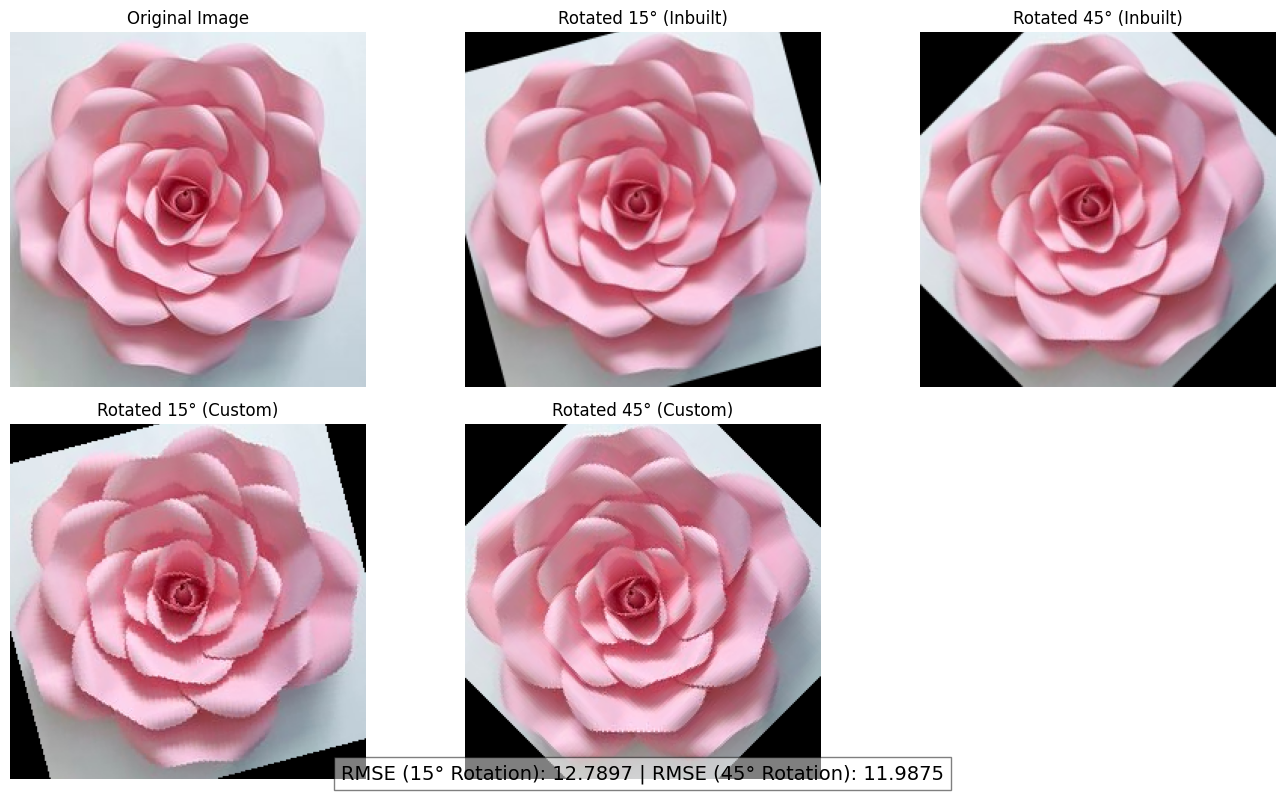

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# A. Rotate an image by Θ using an inbuilt function
def rotate_inbuilt(image, angle):
    
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    # Compute the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)  
    
    # Perform the affine transformation
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR)
    return rotated

# B. Rotate an image using a custom function
def rotate_custom(img, angle):
   
    theta = np.radians(angle)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    
    (h, w) = img.shape[:2]
    center_x, center_y = w // 2, h // 2

    rotated_img = np.zeros_like(img)

    for y in range(h):
        for x in range(w):
            x_shifted = x - center_x
            y_shifted = y - center_y

            # Apply rotation formulas
            src_x = x_shifted * cos_theta - y_shifted * sin_theta + center_x
            src_y = x_shifted * sin_theta + y_shifted * cos_theta + center_y

            if 0 <= int(src_x) < w and 0 <= int(src_y) < h:
                rotated_img[y, x] = img[int(src_y), int(src_x)]

    return rotated_img

# C. Calculate RMSE between two rotated images
def calculate_rmse_between_rotated(rotated_a, rotated_b):
    
    mse = mean_squared_error(rotated_a.flatten(), rotated_b.flatten())
    return np.sqrt(mse)

# D. Plot results
def plot_results(original, rotated_a_15, rotated_a_45, rotated_b_15, rotated_b_45, rmse_15, rmse_45):
    
    plt.figure(figsize=(14, 8))
    
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(2, 3, 2)
    plt.imshow(cv2.cvtColor(rotated_a_15, cv2.COLOR_BGR2RGB))
    plt.title("Rotated 15° (Inbuilt)")
    plt.axis("off")
    
    plt.subplot(2, 3, 3)
    plt.imshow(cv2.cvtColor(rotated_a_45, cv2.COLOR_BGR2RGB))
    plt.title("Rotated 45° (Inbuilt)")
    plt.axis("off")
    
    plt.subplot(2, 3, 4)
    plt.imshow(cv2.cvtColor(rotated_b_15, cv2.COLOR_BGR2RGB))
    plt.title("Rotated 15° (Custom)")
    plt.axis("off")
    
    plt.subplot(2, 3, 5)
    plt.imshow(cv2.cvtColor(rotated_b_45, cv2.COLOR_BGR2RGB))
    plt.title("Rotated 45° (Custom)")
    plt.axis("off")
    
    # Display RMSE scores
    plt.figtext(0.5, 0.02, f"RMSE (15° Rotation): {rmse_15:.4f} | RMSE (45° Rotation): {rmse_45:.4f}", 
                fontsize=14, ha="center", bbox={"facecolor": "white", "alpha": 0.5, "pad": 5})
    
    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    image_path = "sample.jpg"  # Replace with your image path
    original_image = cv2.imread(image_path)
    
    if original_image is None:
        raise ValueError("Image not found. Check the file path.")

    # Rotate using inbuilt function
    rotated_a_15 = rotate_inbuilt(original_image, 15)
    rotated_a_45 = rotate_inbuilt(original_image, 45)
    
    # Rotate using custom function
    rotated_b_15 = rotate_custom(original_image, 15)
    rotated_b_45 = rotate_custom(original_image, 45)
    
    # Calculate RMSE between the two transformed images
    rmse_15 = calculate_rmse_between_rotated(rotated_a_15, rotated_b_15)
    rmse_45 = calculate_rmse_between_rotated(rotated_a_45, rotated_b_45)
    
    # Plot results
    plot_results(original_image, rotated_a_15, rotated_a_45, rotated_b_15, rotated_b_45, rmse_15, rmse_45)

In [ ]:
'''Question 4: Read an image and perform the following operations: (10 marks)
A. Convert the image into grayscale.(0 marks)
B. Perform the Bitplane Slicing operation (8 marks)
C. Display all the images and original image using 3x3 plot and report the
RMSEs with original image (2 marks)
'''

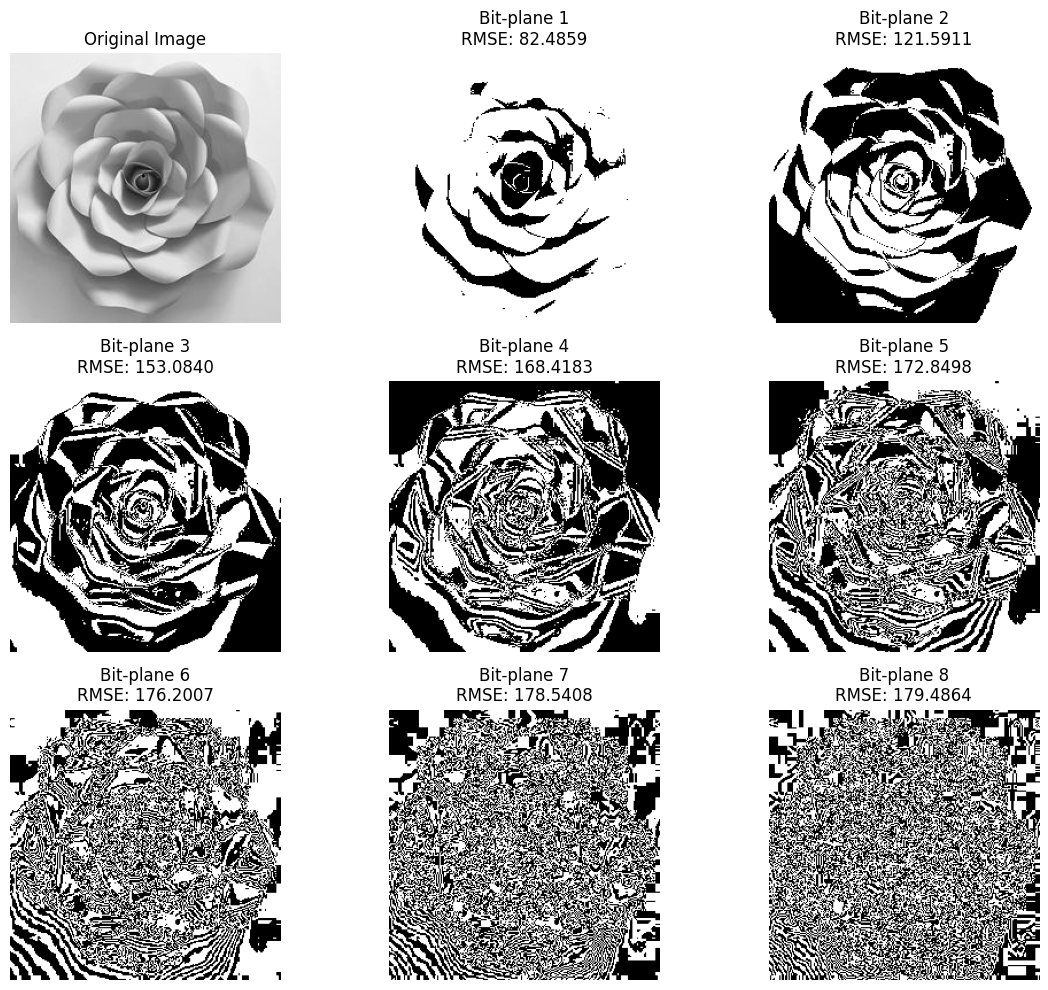

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# A. Convert the image to grayscale
def convert_to_grayscale(image_path):
    """
    Reads an image and converts it to grayscale.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

# B. Perform Bit-plane Slicing (Extracting Each Bit Separately)
def bitplane_slicing(image):
    """
    Extracts individual bit planes from the grayscale image.
    Each bit-plane keeps only one bit and sets others to zero.
    """
    bit_planes = []
    for i in range(8):
        # Extract only the i-th bit (1 if set, 0 otherwise)
        bit_plane = (image >> (7 - i)) & 1  # 7-i to follow MSB->LSB order
        # Scale up to 0-255 for visualization
        bit_planes.append(bit_plane * 255)
    return bit_planes

# C. Calculate RMSE with proper weighting
def calculate_rmse(original, bitplane_image, bit_position):
    """
    Compute RMSE between the original grayscale image and the weighted bit-plane.
    Each bit-plane is scaled by its actual significance (2^(7-bit_position)).
    """
    # Weight the bit-plane correctly
    weight = 2 ** (8 - bit_position)  
    weighted_bitplane = (bitplane_image // 255) * weight  

    # Compute RMSE
    mse = mean_squared_error(original.flatten(), weighted_bitplane.flatten())
    return np.sqrt(mse)

# D. Plot Results
def plot_bitplanes(original, bit_planes, rmse_values):
    """
    Plots the original image and its corresponding bit planes with RMSE values.
    """
    plt.figure(figsize=(12, 10))
    
    # Plot original grayscale image
    plt.subplot(3, 3, 1)
    plt.imshow(original, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")
    
    # Plot bit-planes
    for i in range(8):
        plt.subplot(3, 3, i + 2)
        plt.imshow(bit_planes[i], cmap="gray")
        plt.title(f"Bit-plane {i + 1}\nRMSE: {rmse_values[i]:.4f}")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Main Code
if __name__ == "__main__":

    image_path = "sample.jpg"  # Replace with your image path
    
   
    grayscale_image = convert_to_grayscale(image_path)
    bit_planes = bitplane_slicing(grayscale_image)
    rmse_values = [calculate_rmse(grayscale_image, bit_planes[i], i) for i in range(8)]
    plot_bitplanes(grayscale_image, bit_planes, rmse_values)


In [ ]:
'''Question 5: Read an image and perform the following operations: (20 marks)
A. Perform a Histogram Equalization using an inbuilt function (2 marks)
B. Perform a Histogram Equalization using a user defined function histeq(img)
(15 marks)
C. Calculate the RMSE of histogram images obtained from part a and part b. (2
marks)
D. Plot the original image, histogram image(part a), histogram image(part b)
and their RMSE Score. (1 mark)
'''

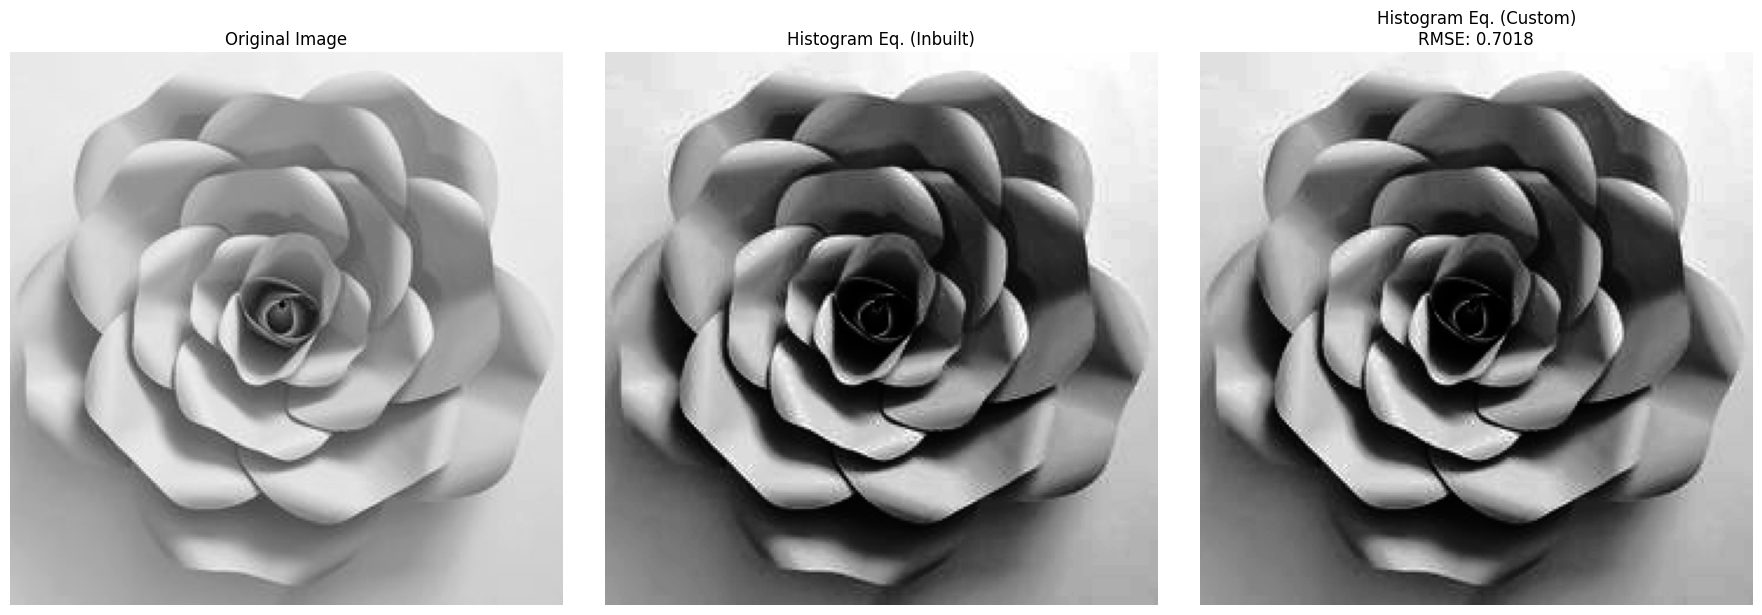

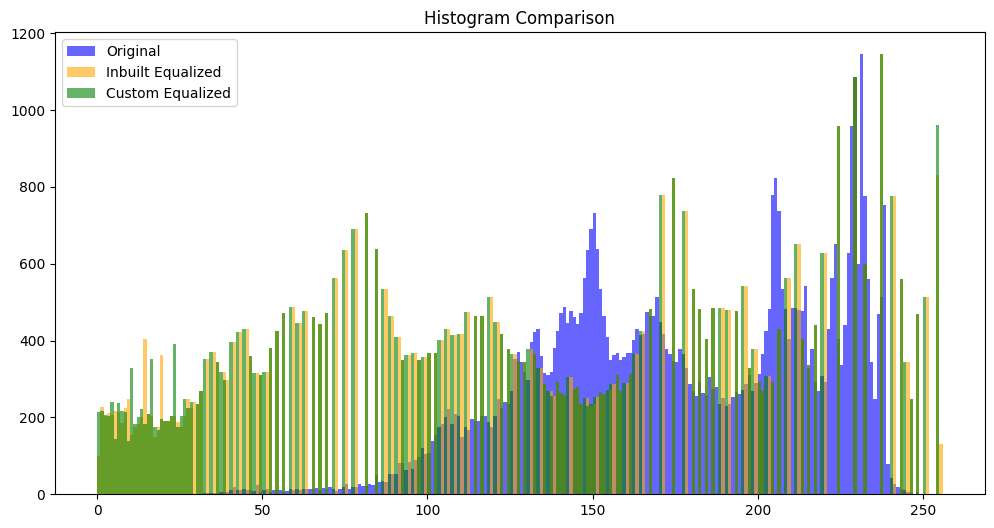

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# A. Perform Histogram Equalization using an inbuilt function
def inbuilt_histeq(image):
    
    return cv2.equalizeHist(image)

# B. Perform Histogram Equalization using a user-defined function
def histeq(img):
    
    hist, _ = np.histogram(img.flatten(), bins=256, range=[0,256])
    cdf = np.cumsum(hist)
    cdf_normalized = cdf / cdf[-1]
    cdf_scaled = np.floor(255 * cdf_normalized).astype(np.uint8)
    equalized_img = cdf_scaled[img]
    return equalized_img

# C. Calculate RMSE between inbuilt and custom histogram-equalized images
def calculate_rmse_between_histeq(hist_a, hist_b):
    
    mse = mean_squared_error(hist_a.flatten(), hist_b.flatten())
    return np.sqrt(mse)

# D. Plot Images Side by Side
def plot_side_by_side(original, hist_a, hist_b, rmse):
    
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.imshow(hist_a, cmap="gray")
    plt.title("Histogram Eq. (Inbuilt)")
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.imshow(hist_b, cmap="gray")
    plt.title(f"Histogram Eq. (Custom)\nRMSE: {rmse:.4f}")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# E. Plot Histograms
def plot_histograms(original, hist_a, hist_b):
    
    plt.figure(figsize=(12, 6))

    plt.hist(original.flatten(), bins=256, range=[0, 256], color='blue', alpha=0.6, label="Original")
    plt.hist(hist_a.flatten(), bins=256, range=[0, 256], color='orange', alpha=0.6, label="Inbuilt Equalized")
    plt.hist(hist_b.flatten(), bins=256, range=[0, 256], color='green', alpha=0.6, label="Custom Equalized")
    
    plt.title("Histogram Comparison")
    plt.legend()
    plt.show()

# Main Code
if __name__ == "__main__":
    # Load the grayscale image
    image_path = "sample.jpg"  # Replace with your image path
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if original_image is None:
        raise ValueError("Image not found. Check the file path.")

    # Part A: Perform Histogram Equalization using inbuilt function
    hist_image_a = inbuilt_histeq(original_image)
    
    # Part B: Perform Histogram Equalization using a custom function
    hist_image_b = histeq(original_image)
    
    # Part C: Calculate RMSE between histogram-equalized images
    rmse = calculate_rmse_between_histeq(hist_image_a, hist_image_b)
    
    # Part D: Plot Images Side by Side
    plot_side_by_side(original_image, hist_image_a, hist_image_b, rmse)
    
    # Part E: Plot Histograms
    plot_histograms(original_image, hist_image_a, hist_image_b)


In [ ]:
'''Question 6: Read jpg image and perform the following operations: (35 marks)
A. Perform a Adaptive Histogram Equalization using an inbuilt function (2
marks)
B. Perform a Adaptive Histogram Equalization using a user defined function
adaphisteq(img, tilesize ) (30 marks)
C. Calculate the RMSE of histogram images obtained from part a and part b. (2
marks)
D. Plot the original image, histogram image(part a), histogram image(part b)
and their RMSE Score. (1 mark)'''

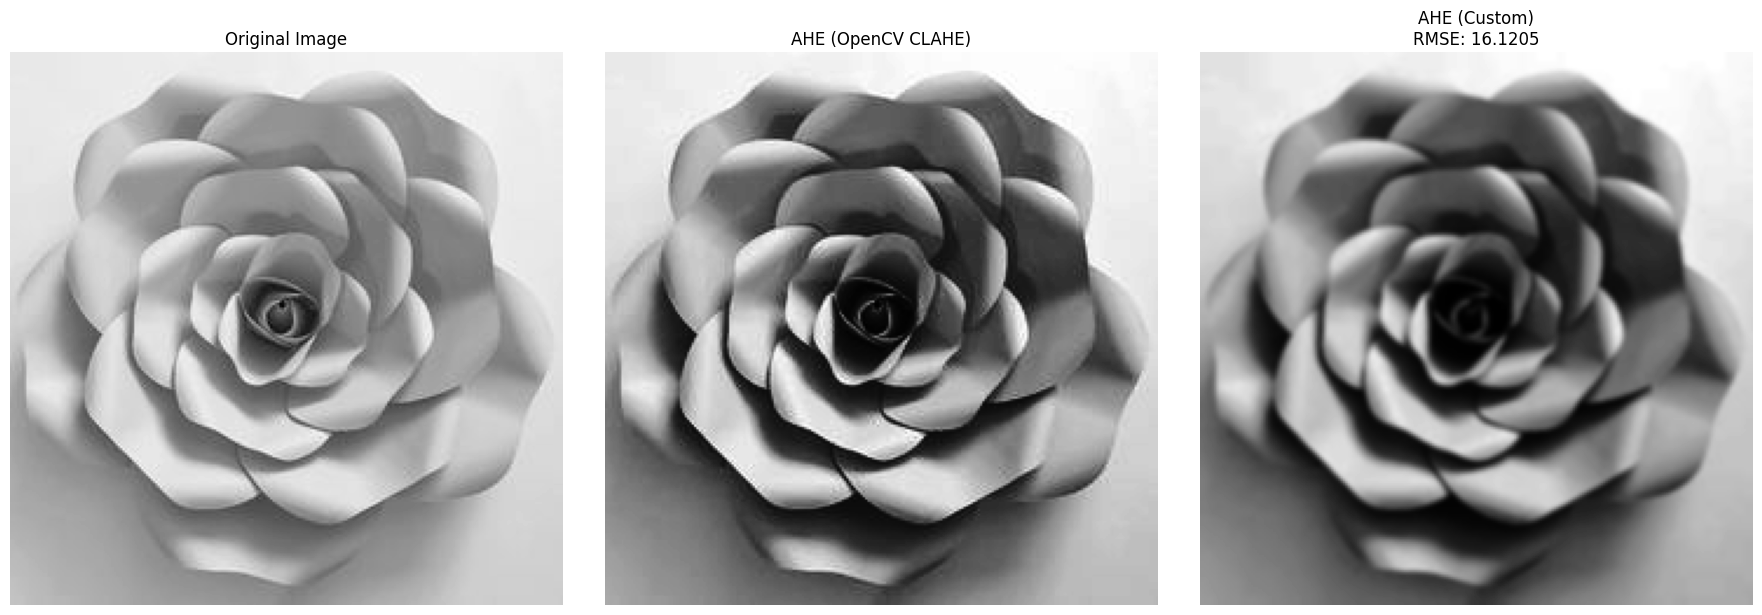

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# A. Perform Adaptive Histogram Equalization using OpenCV's inbuilt function
def inbuilt_adaphisteq(image, tilesize):
    """
    Apply OpenCV's Adaptive Histogram Equalization (CLAHE).
    """
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(tilesize, tilesize))
    return clahe.apply(image)

# B. Perform Adaptive Histogram Equalization using a user-defined function
def adaphisteq(img, tilesize):
    """
    Custom Adaptive Histogram Equalization (AHE).
    Divides the image into non-overlapping tiles and applies histogram equalization.
    """
    h, w = img.shape
    output = np.zeros_like(img)

    # Compute tile dimensions
    tile_h = h // tilesize
    tile_w = w // tilesize

    for i in range(tilesize):
        for j in range(tilesize):
            # Extract tile
            x_start, y_start = i * tile_h, j * tile_w
            x_end, y_end = min((i + 1) * tile_h, h), min((j + 1) * tile_w, w)
            tile = img[x_start:x_end, y_start:y_end]

            # Compute histogram equalization for the tile
            hist, _ = np.histogram(tile.flatten(), bins=256, range=[0, 256])
            cdf = np.cumsum(hist)
            cdf_normalized = cdf / cdf[-1]  # Normalize CDF
            cdf_scaled = np.floor(255 * cdf_normalized).astype(np.uint8)

            # Apply mapping to tile
            tile_equalized = cdf_scaled[tile]
            output[x_start:x_end, y_start:y_end] = tile_equalized

    # Apply a slight blur to remove tiling artifacts
    output = cv2.GaussianBlur(output, (5, 5), 0)
    return output

# C. Calculate RMSE between inbuilt and custom AHE images
def calculate_rmse_between_ahe(hist_a, hist_b):
    """
    Compute RMSE between the inbuilt and custom adaptive histogram equalized images.
    """
    mse = mean_squared_error(hist_a.flatten(), hist_b.flatten())
    return np.sqrt(mse)

# D. Plot Results
def plot_results(original, hist_a, hist_b, rmse):
    """
    Plot original image, OpenCV CLAHE image, and custom AHE image.
    """
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.imshow(hist_a, cmap="gray")
    plt.title("AHE (OpenCV CLAHE)")
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.imshow(hist_b, cmap="gray")
    plt.title(f"AHE (Custom)\nRMSE: {rmse:.4f}")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Main Code
if __name__ == "__main__":
    # Load the grayscale image
    image_path = "sample.jpg"  # Replace with your actual image path
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if original_image is None:
        raise ValueError("Image not found. Check the file path.")

    # Tile size for AHE (should be a power of 2, e.g., 8, 16, 32)
    tilesize = 1  

    # Part A: Perform Adaptive Histogram Equalization using OpenCV CLAHE
    hist_image_a = inbuilt_adaphisteq(original_image, tilesize)
    
    # Part B: Perform Adaptive Histogram Equalization using a user-defined function
    hist_image_b = adaphisteq(original_image, tilesize)
    
    # Part C: Calculate RMSE between AHE images
    rmse = calculate_rmse_between_ahe(hist_image_a, hist_image_b)
    
    # Part D: Plot Results
    plot_results(original_image, hist_image_a, hist_image_b, rmse)


In [ ]:
'''Question 7: Read histogram.jpg image and perform the following operations:
(30 marks)
A. Perform a Histogram Matching with a reference.jpg using an inbuilt
function. (2 marks)
B. Perform a Histogram Matching with a reference.jpg using a user defined
function histmatch(img, reference_img). (25 marks)
C. Calculate the RMSE of histogram images obtained from part a and part b. (2
marks)
D. Plot the original images, histogram image(part a), histogram image(part b)
and their RMSE Score. (1 mark)
'''

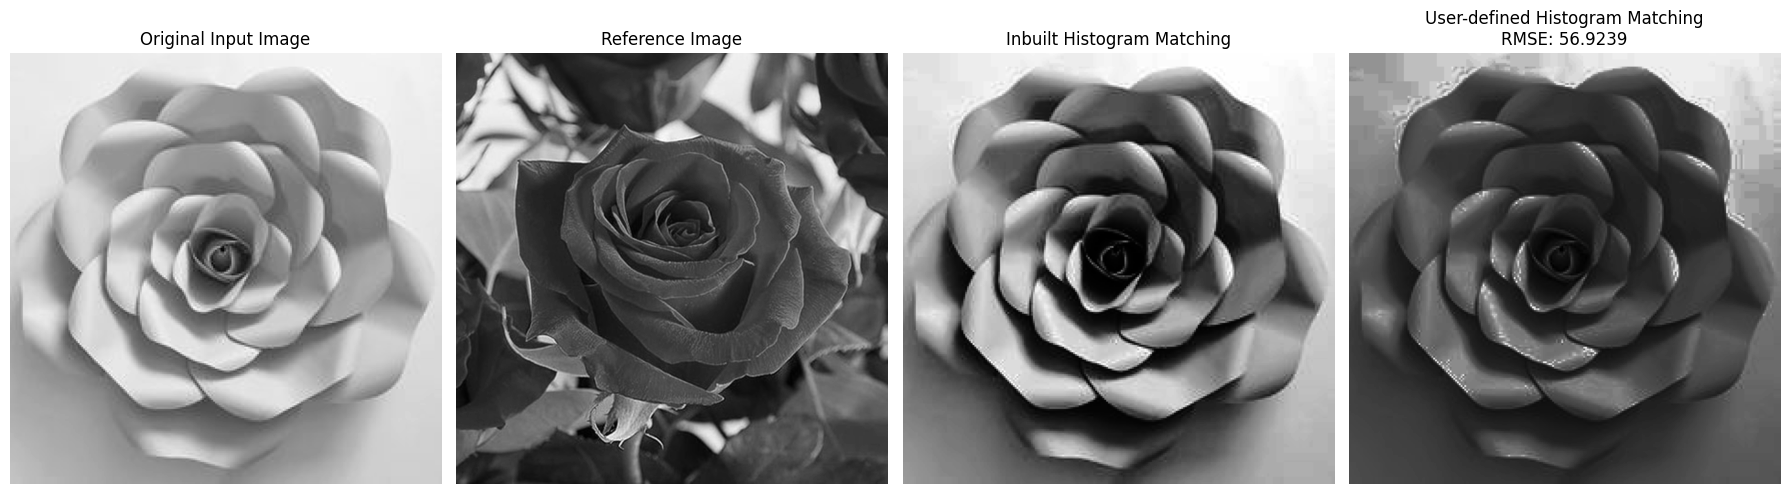

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Perform Histogram Equalization
def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=(0, 256))
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]  # Normalize the CDF
    equalized_image = np.floor(255 * cdf_normalized[image]).astype(np.uint8)
    return equalized_image, cdf_normalized
def histmatch_custom(input_img, reference_img):
   # Compute histograms and CDFs
    hist_input, _ = np.histogram(input_img.flatten(), bins=256, range=(0, 256))
    hist_reference, _ = np.histogram(reference_img.flatten(), bins=256, range=(0, 256))

    cdf_input = np.cumsum(hist_input).astype(np.float64)
    cdf_reference = np.cumsum(hist_reference).astype(np.float64)

    # Normalize CDFs to range [0, 1]
    cdf_input /= cdf_input[-1]
    cdf_reference /= cdf_reference[-1]

    # Create a mapping: Find the closest matching reference intensity for each input intensity
    mapping = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        # Find the closest intensity in the reference CDF
        closest = np.argmin(np.abs(cdf_reference - cdf_input[i]))
        mapping[i] = closest  # Assign closest reference intensity

    # Apply the mapping to the input image
    matched_img = mapping[input_img]
    return matched_img



# Perform Histogram Matching using OpenCV’s built-in function
def histmatch_inbuilt(input_img):
    return cv2.equalizeHist(input_img)

# Manually Compute RMSE
def calculate_rmse_manual(image1, image2):
    diff = (image1.astype(np.float64) - image2.astype(np.float64)) ** 2
    mse = np.mean(diff)
    return np.sqrt(mse)

# Plot Results
def plot_results(original, reference, matched_inbuilt, matched_custom, rmse_value):
    plt.figure(figsize=(18, 6))
    
    # Original Input Image
    plt.subplot(1, 4, 1)
    plt.imshow(original, cmap="gray")
    plt.title("Original Input Image")
    plt.axis("off")
    
    # Reference Image
    plt.subplot(1, 4, 2)
    plt.imshow(reference, cmap="gray")
    plt.title("Reference Image")
    plt.axis("off")
    
    # Histogram Matched Image (Inbuilt)
    plt.subplot(1, 4, 3)
    plt.imshow(matched_inbuilt, cmap="gray")
    plt.title("Inbuilt Histogram Matching")
    plt.axis("off")
    
    # Histogram Matched Image (Custom)
    plt.subplot(1, 4, 4)
    plt.imshow(matched_custom, cmap="gray")
    plt.title(f"User-defined Histogram Matching\nRMSE: {rmse_value:.4f}")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Main Code
if __name__ == "__main__":
    # Load the grayscale images
    input_image_path = "sample.jpg"  # Input Image
    reference_image_path = "reference.webp"  # Reference Image
    
    input_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
    reference_image = cv2.imread(reference_image_path, cv2.IMREAD_GRAYSCALE)
    
    # Perform Histogram Matching using OpenCV's inbuilt function
    matched_inbuilt = histmatch_inbuilt(input_image)

    # Perform Histogram Matching using the user-defined function
    matched_custom = histmatch_custom(input_image, reference_image)
    
    # Calculate RMSE between the inbuilt function's output and the custom function's output
    rmse_value = calculate_rmse_manual(matched_inbuilt, matched_custom)
    
    # Plot Results
    plot_results(input_image, reference_image, matched_inbuilt, matched_custom, rmse_value)


In [ ]:
'''Question 8: Read jpg image and perform the following operations: (35 marks)
A. Perform an Affine Transformation using an inbuilt function (2 marks)
B. Perform an Affine Transformation using a user defined function
af inetransform(img, tilepts ) (30 marks)
C. Calculate the RMSE of transformed images obtained from part a and part b.
(2 marks)
D. Plot the original images, transformed image (part a), transformed image
(part b) and their RMSE Score. (1 mark)
'''

Enter the affine transformation coefficients:


Enter a (scaling/rotation factor):  2
Enter b (shear factor):  0
Enter c (shear factor):  0
Enter d (scaling/rotation factor):  2
Enter tx (translation in x):  3
Enter ty (translation in y):  4


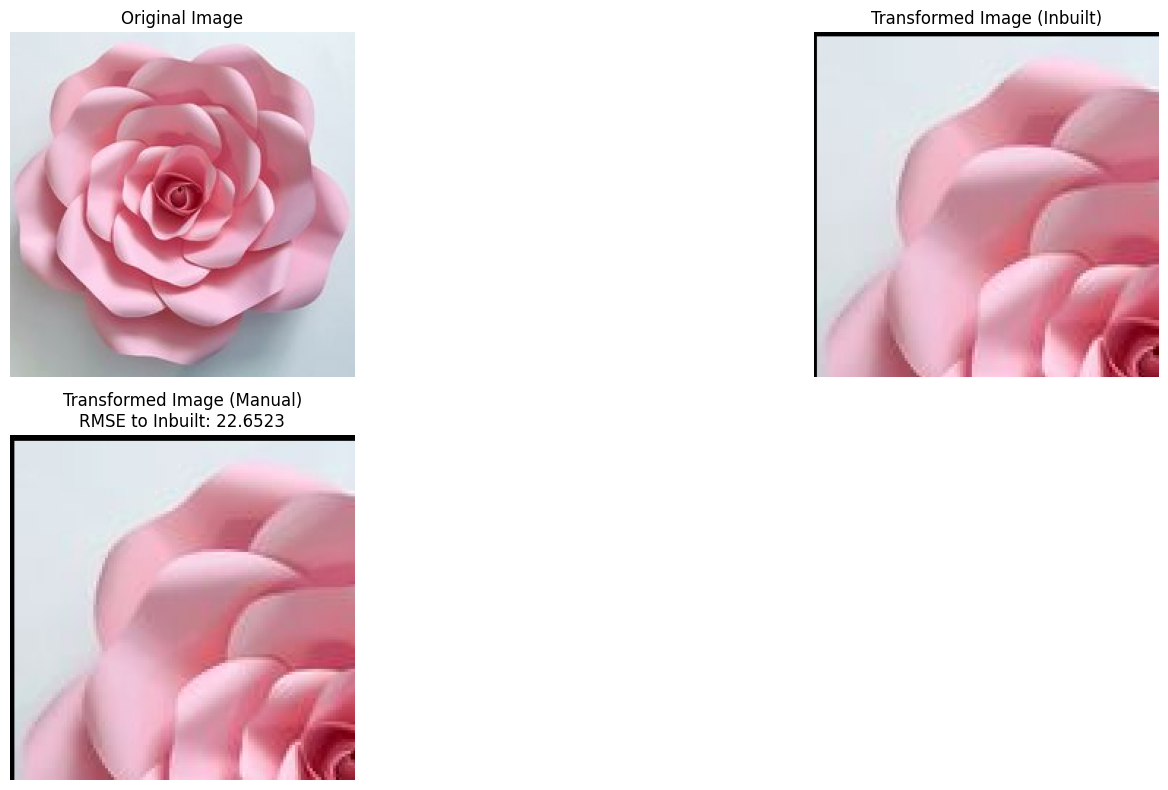

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def calculate_rmse(image1, image2):
    if image1.shape != image2.shape:
        image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]), interpolation=cv2.INTER_LINEAR)
    
    mse = mean_squared_error(image1.flatten(), image2.flatten())
    return np.sqrt(mse)

# Function to apply affine transformation using OpenCV
def affine_inbuilt(image, matrix):
    rows, cols = image.shape[:2]
    transformed_image = cv2.warpAffine(image, matrix, (cols, rows), flags=cv2.INTER_NEAREST)  # Match interpolation
    return transformed_image

# Function to apply affine transformation manually
def affine_transform_manual(image, a, b, c, d, tx, ty):
    rows, cols = image.shape[:2]
    transformed_image = np.zeros_like(image)

    # Augment the 2x3 affine matrix into a 3x3 matrix
    matrix = np.array([[a, b, tx],
                       [c, d, ty],
                       [0, 0, 1]])

    # Compute the inverse of the augmented matrix
    inv_matrix = np.linalg.inv(matrix)

    # Iterate over every pixel in the output image
    for x in range(cols):
        for y in range(rows):
            original_coords = np.array([x, y, 1])  # Homogeneous coordinates
            transformed_coords = inv_matrix @ original_coords
            orig_x, orig_y = transformed_coords[:2]

            # Nearest neighbor interpolation
            if 0 <= orig_x < cols and 0 <= orig_y < rows:
                transformed_image[y, x] = image[int(orig_y), int(orig_x)]

    return transformed_image

# Main Code
if __name__ == "__main__":
    # Load the image
    image_path = "sample.jpg"  # Replace with your image path
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Unable to load the image. Please check the file path: {image_path}")
        exit()

    # User-defined affine transformation coefficients
    print("Enter the affine transformation coefficients:")
    a = float(input("Enter a (scaling/rotation factor): "))
    b = float(input("Enter b (shear factor): "))
    c = float(input("Enter c (shear factor): "))
    d = float(input("Enter d (scaling/rotation factor): "))
    tx = float(input("Enter tx (translation in x): "))
    ty = float(input("Enter ty (translation in y): "))

    # Create the affine transformation matrix for OpenCV
    matrix = np.array([[a, b, tx], [c, d, ty]], dtype=np.float32)

    # Apply affine transformation using OpenCV
    transformed_inbuilt = affine_inbuilt(image, matrix)

    # Apply affine transformation manually
    transformed_manual = affine_transform_manual(image, a, b, c, d, tx, ty)

    # Calculate RMSE between inbuilt and user-defined affine transformed images
    rmse_manual_inbuilt = calculate_rmse(transformed_inbuilt, transformed_manual)

    # Overlay difference for visual inspection
    difference = cv2.absdiff(transformed_inbuilt, transformed_manual)

    # Plot the images
    plt.figure(figsize=(18, 8))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    # Transformed Image (Inbuilt)
    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(transformed_inbuilt, cv2.COLOR_BGR2RGB))
    plt.title("Transformed Image (Inbuilt)")
    plt.axis("off")

    # Transformed Image (Manual)
    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(transformed_manual, cv2.COLOR_BGR2RGB))
    plt.title(f"Transformed Image (Manual)\nRMSE to Inbuilt: {rmse_manual_inbuilt:.4f}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
